In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
df=pd.read_csv(r'D:\Data Analytics\Python\Panda\Problem_Solving\ecommerce_clean.csv')

In [2]:
df.head(2)

,Unnamed: 0,index,order_id,order_date,delivered_date,customer_id,customer_name,customer_age,customer_gender,customer_segment,region,state,city,product_id,product_name,category,sub_category,brand,unit_price,quantity,discount_percentage,discount_amount,sales_amount,profit_margin,profit_amount,tax_rate,tax_amount,shipping_cost,shipping_method,total_amount,payment_method,delivery_time_days,order_status,rating,is_repeat_customer,order_year,order_month,order_quarter,order_day_of_week
0,0,0,ORD100722,2020-01-01,2020-01-04,CUST10257,Vikram Kumar,56,Female,Corporate,Central,Madhya Pradesh,Indore,PROD9221,Local Publishers Comics,Books,Comics,Local Publishers,495.34,1,10,49.53,445.80,0.448,199.71,0.12,53.50,56.65,Standard,555.95,Credit Card,3,Delivered,4.5,No,2020,1,Q1,Wednesday
1,1,1,ORD100766,2020-01-14,2020-01-15,CUST10171,Kavita Kumar,57,Male,Consumer,West,Gujarat,Vadodara,PROD6296,Oxford Self-Help,Books,Self-Help,Oxford,1313.37,4,0,0.00,5253.49,0.439,2306.35,0.12,630.42,125.12,Express,6009.03,Debit Card,1,Delivered,5.0,No,2020,1,Q1,Tuesday


### Compare average profit_margin (%) across shipping_method. Also show how many orders each shipping method has.

In [18]:
# df.groupby('shipping_method')['profit_margin']\
#     .agg(avg_profit_margin='mean',count_of_order='count')\
#     .sort_values(by='count_of_order',ascending=False)\
#     .reset_index()

# or

df.groupby('shipping_method')\
    .agg({'profit_margin':'mean','order_id':'count'})\
    .sort_values(by='order_id',ascending=False)\
    .reset_index()

,shipping_method,profit_margin,order_id
0,Standard,0.240324,508
1,Express,0.250284,306
2,Same Day,0.236255,95
3,Economy,0.239878,91


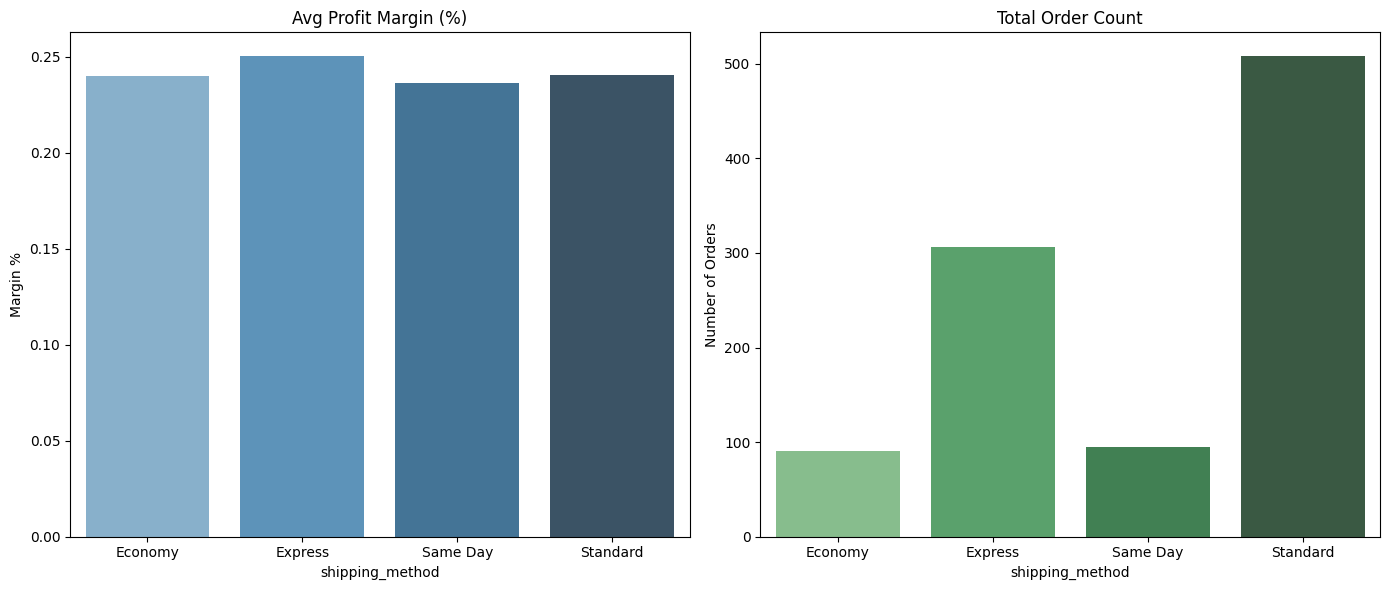

In [ ]:
# 1. Prepare the data
shipping_data = df.groupby('shipping_method')['profit_margin']\
                  .agg(avg_margin='mean', order_count='count')\
                  .reset_index()

# 2. Create a figure with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Chart 1: Profit Margin
sns.barplot(data=shipping_data, x='shipping_method', y='avg_margin', ax=ax[0], palette='Blues_d',hue='shipping_method')
ax[0].set_title('Avg Profit Margin (%)')
ax[0].set_ylabel('Margin %')

# Chart 2: Order Count
sns.barplot(data=shipping_data, x='shipping_method', y='order_count', ax=ax[1], palette='Greens_d',hue='shipping_method')
ax[1].set_title('Total Order Count')
ax[1].set_ylabel('Number of Orders')

plt.tight_layout()
plt.show()
